In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import data

In [3]:
meta_data = pd.read_csv('../Data/Chest_xray_Corona_Metadata.csv')

### Check for missing values

In [4]:
missing_vals = meta_data.isnull().sum()
print(missing_vals)

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64


### Split data into train and test set based on label 

In [5]:
train_data = meta_data[meta_data['Dataset_type'] == 'TRAIN']
test_data = meta_data[meta_data['Dataset_type'] == 'TEST']

### Preview training data

In [6]:
train_data.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


### Summary Statistics of training data

In [7]:
train_data.describe(include="all")

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
count,5286.000000,5286,5286,5286,69,3944
unique,NaN,5286,2,1,4,3
top,NaN,NORMAL2-IM-0496-0001.jpeg,Pnemonia,TRAIN,COVID-19,bacteria
freq,NaN,1,3944,5286,58,2535
mean,2642.664586,NaN,NaN,NaN,NaN,NaN
std,1526.364213,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1321.250000,NaN,NaN,NaN,NaN,NaN
50%,2642.500000,NaN,NaN,NaN,NaN,NaN
75%,3963.750000,NaN,NaN,NaN,NaN,NaN


In [8]:
train_data.value_counts()

Unnamed: 0  X_ray_image_name                                                  Label     Dataset_type  Label_2_Virus_category  Label_1_Virus_category
5216        streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg  Pnemonia  TRAIN         Streptococcus           bacteria                  1
5276        44C8E3D6-20DA-42E9-B33B-96FA6D6DE12F.jpeg                         Pnemonia  TRAIN         COVID-19                Virus                     1
5284        31BA3780-2323-493F-8AED-62081B9C383B.jpeg                         Pnemonia  TRAIN         COVID-19                Virus                     1
5283        35AF5C3B-D04D-4B4B-92B7-CB1F67D83085.jpeg                         Pnemonia  TRAIN         COVID-19                Virus                     1
5281        39EE8E69-5801-48DE-B6E3-BE7D1BCF3092.jpeg                         Pnemonia  TRAIN         COVID-19                Virus                     1
                                                                                 

## Visualizing the data ratio

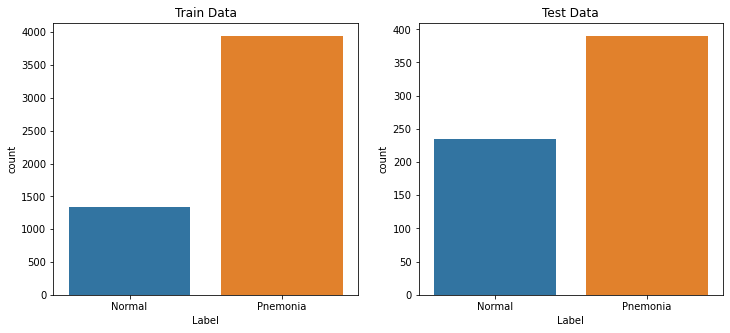

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
sns.countplot(data=train_data, x='Label',ax=ax[0])
sns.countplot(data=test_data, x='Label',ax =ax[1])
ax[0].set_title('Train Data')
ax[1].set_title('Test Data')
plt.show()

## Exporting the data

In [10]:
train_data[['X_ray_image_name', 'Label']].to_csv("../Data/training_label.csv", index = False)

In [11]:
test_data[['X_ray_image_name', 'Label']].to_csv("../Data/testing_label.csv", index = False)